In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:

# Load your CSV file
data = pd.read_csv('fashion-mnist_train.csv')  # Replace with your actual file path

In [12]:
data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [4]:
# Separate features and labels
X = data.drop('label', axis=1).values  # Pixel values
y = data['label'].values      

In [5]:
# Normalize
X = X / 255.0

# Reshape to CNN input shape
X = X.reshape(-1, 28, 28, 1)

In [6]:
# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [8]:
# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/3


750/750 [==============================] - 9s 11ms/step - loss: 0.6476 - accuracy: 0.7647 - val_loss: 0.3950 - val_accuracy: 0.8531
Epoch 2/3
750/750 [==============================] - 8s 10ms/step - loss: 0.4180 - accuracy: 0.8521 - val_loss: 0.3428 - val_accuracy: 0.8707
Epoch 3/3
750/750 [==============================] - 8s 11ms/step - loss: 0.3576 - accuracy: 0.8715 - val_loss: 0.3174 - val_accuracy: 0.8808


In [9]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

375/375 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8808
Test Accuracy: 0.8808


In [13]:
# # Plotting accuracy and loss
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train')
# plt.plot(history.history['val_accuracy'], label='Test')
# plt.title('Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train')
# plt.plot(history.history['val_loss'], label='Test')
# plt.title('Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.tight_layout()
# plt.show()

375/375 [==============================] - 1s 2ms/step


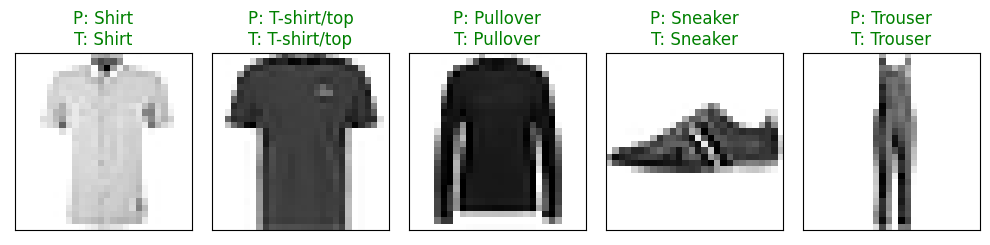

In [11]:
# Prediction and visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = model.predict(x_test)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"P: {class_names[pred_label]}\nT: {class_names[true_label]}", color=color)
plt.tight_layout()
plt.show()